In [1]:
import pandas as pd
import numpy as np

In [2]:
import os, glob

In [3]:
cd "/data/users/noahkleinschmidt/EcoTyper/results"

/data/users/noahkleinschmidt/EcoTyper/results


In [4]:
mkdir "exports"

mkdir: cannot create directory ‘exports’: File exists


In [5]:
from eco_helper.core import *

In [6]:
dirs = [ "drop_hepato" ] #], "drop_hepato_run2", "drop_hepato_run3", "drop_hepato_run2_30", "drop_hepato_run3_30" ]

In [7]:
states = CellStateCollection( dirs )
sets = states.get_genes()

In [7]:
sets.save( "drop_hepato_sets2.tsv" )

In [8]:
states.export_to_gseapy( "exports", enrichr = True, prerank = True )

In [9]:
for i in sets.subsets():
    for _,j in i:
        print(j)

          State     MaxFC          run
CXCL1       S01  1.581027  drop_hepato
C19orf33    S01  1.564903  drop_hepato
TFPI2       S01  1.484264  drop_hepato
SGMS2       S01  1.392108  drop_hepato
GABRP       S01  1.385611  drop_hepato
...         ...       ...          ...
LINC00205   S01  0.087593  drop_hepato
PIWIL4      S01  0.083300  drop_hepato
WDR34       S01  0.082306  drop_hepato
VTCN1       S01  0.072279  drop_hepato
WDR13       S01  0.057325  drop_hepato

[678 rows x 3 columns]
         State     MaxFC          run
DNAJC22    S02  1.512001  drop_hepato
ITIH2      S02  1.391896  drop_hepato
SDC1       S02  1.333988  drop_hepato
VCAN       S02  1.307029  drop_hepato
REEP6      S02  1.260846  drop_hepato
...        ...       ...          ...
SLC25A27   S02  0.082926  drop_hepato
TPRN       S02  0.080072  drop_hepato
GGT6       S02  0.039939  drop_hepato
FREM2      S02  0.036940  drop_hepato
WDR35      S02  0.025658  drop_hepato

[299 rows x 3 columns]
           State     MaxFC  

In [15]:
mast_s01 = sets[ "Mast_cells", "S01" ].index.to_list()

In [13]:
import gseapy as gp

In [36]:
enrichr = gp.enrichr( mast_s01, gene_sets = "GO_Biological_Process_2021", organism = "human", outdir = "exports" )

In [37]:
enrichr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),23/621,1.586382e-07,0.000140,0,0,3.968776,62.137692,EDARADD;IL4R;CSF1;LIF;IL5RA;IRS2;CSF2RB;NFKB1;...
1,GO_Biological_Process_2021,lipoxin metabolic process (GO:2001300),4/6,1.709803e-07,0.000140,0,0,193.063415,3008.259555,HPGD;ALOX5;ALOX5AP;LTC4S
2,GO_Biological_Process_2021,lipoxin biosynthetic process (GO:2001301),4/7,3.956887e-07,0.000217,0,0,128.702439,1897.413460,HPGD;ALOX5;ALOX5AP;LTC4S
3,GO_Biological_Process_2021,cellular response to cytokine stimulus (GO:007...,17/482,1.341066e-05,0.004746,0,0,3.679906,41.286561,IL4R;CSF1;LIF;IL5RA;CSF2RB;NFKB1;TEC;ALOX5;GRA...
4,GO_Biological_Process_2021,lipoxygenase pathway (GO:0019372),4/15,1.445045e-05,0.004746,0,0,35.086475,391.031217,HPGD;ALOX5;ALOX5AP;LTC4S
...,...,...,...,...,...,...,...,...,...,...
1637,GO_Biological_Process_2021,mRNA processing (GO:0006397),1/300,9.582215e-01,0.960562,0,0,0.313417,0.013375,CTNNBL1
1638,GO_Biological_Process_2021,protein polyubiquitination (GO:0000209),1/314,9.640180e-01,0.965194,0,0,0.299183,0.010964,ZNRF1
1639,GO_Biological_Process_2021,cellular macromolecule biosynthetic process (G...,1/314,9.640180e-01,0.965194,0,0,0.299183,0.010964,PTMA
1640,GO_Biological_Process_2021,proteasome-mediated ubiquitin-dependent protei...,1/321,9.666086e-01,0.967198,0,0,0.292533,0.009935,ZNRF1


In [39]:
enrichr.results.sort_values( "Combined Score" )

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1641,GO_Biological_Process_2021,gene expression (GO:0010467),1/356,9.770274e-01,0.977027,0,0,0.263218,0.006117,PTMA
1640,GO_Biological_Process_2021,proteasome-mediated ubiquitin-dependent protei...,1/321,9.666086e-01,0.967198,0,0,0.292533,0.009935,ZNRF1
1639,GO_Biological_Process_2021,cellular macromolecule biosynthetic process (G...,1/314,9.640180e-01,0.965194,0,0,0.299183,0.010964,PTMA
1638,GO_Biological_Process_2021,protein polyubiquitination (GO:0000209),1/314,9.640180e-01,0.965194,0,0,0.299183,0.010964,ZNRF1
1637,GO_Biological_Process_2021,mRNA processing (GO:0006397),1/300,9.582215e-01,0.960562,0,0,0.313417,0.013375,CTNNBL1
...,...,...,...,...,...,...,...,...,...,...
33,GO_Biological_Process_2021,protein citrullination (GO:0018101),2/5,1.064503e-03,0.051409,0,0,63.729469,436.243954,PADI2;PADI4
32,GO_Biological_Process_2021,negative regulation of mast cell activation in...,2/5,1.064503e-03,0.051409,0,0,63.729469,436.243954,CD84;ENPP3
31,GO_Biological_Process_2021,histone citrullination (GO:0036414),2/5,1.064503e-03,0.051409,0,0,63.729469,436.243954,PADI2;PADI4
2,GO_Biological_Process_2021,lipoxin biosynthetic process (GO:2001301),4/7,3.956887e-07,0.000217,0,0,128.702439,1897.413460,HPGD;ALOX5;ALOX5AP;LTC4S


<AxesSubplot:xlabel='Combined Score'>

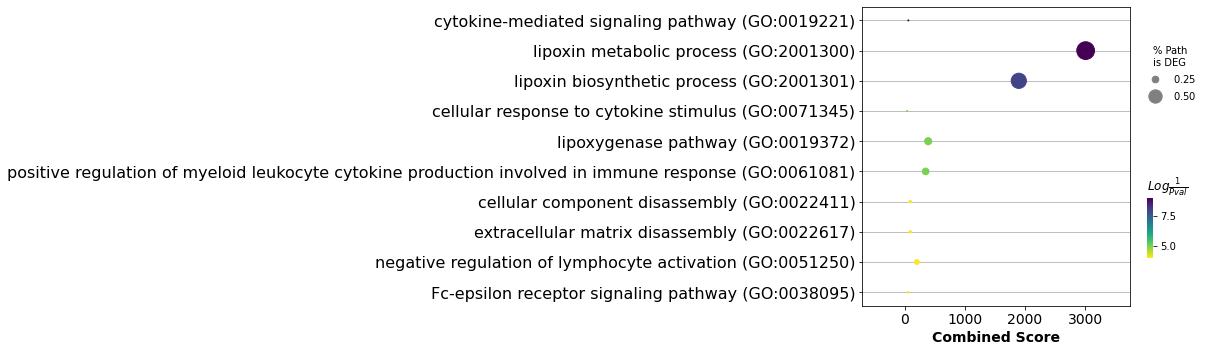

In [40]:
gp.dotplot( enrichr.results )

In [41]:
mast_s01_full = sets[ "Mast_cells", "S01" ]

In [43]:
mast_s01_full = mast_s01_full[ "MaxFC" ]
mast_s01_full

TPSAB1    2.570761
CPA3      2.559601
TPSB2     2.552876
KIT       2.508734
MS4A2     2.479573
            ...   
MYLPF     0.179662
ACBD7     0.170862
UNC13D    0.168530
MADD      0.162079
PADI4     0.144438
Name: MaxFC, Length: 209, dtype: float64

In [54]:
pre_res = gp.prerank(rnk=mast_s01_full,
                     gene_sets=['Reactome_2016', 'WikiPathways_2019_Human'],
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2022-08-23 20:01:53,560 Parsing data files for GSEA.............................
2022-08-23 20:01:53,561 Enrichr library gene sets already downloaded in: /home/noahkleinschmidt/.cache/gseapy, use local file
2022-08-23 20:01:54,378 Downloading and generating Enrichr library gene sets......
2022-08-23 20:01:56,730 1904 gene_sets have been filtered out when max_size=1000 and min_size=5
2022-08-23 20:01:56,733 0098 gene_sets used for further statistical testing.....
2022-08-23 20:01:56,735 Start to run GSEA...Might take a while..................
2022-08-23 20:01:57,031 Congratulations. GSEApy runs successfully................



In [56]:
pre_res.res2d.sort_values( "Gene %")

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Reactome_2016__Arachidonic acid metabolism Hom...,0.81623,1.756358,0.00346,0.095,0.04,5/53,10.05%,LTC4S;HPGDS;ALOX5;PTGS1;HPGD
65,prerank,Reactome_2016__Membrane Trafficking Homo sapie...,0.504448,1.033373,0.434406,0.556313,1.0,2/420,18.18%,AREG;AP1S3
66,prerank,Reactome_2016__Vesicle-mediated transport Homo...,0.504448,1.033373,0.434406,0.556313,1.0,2/492,18.18%,AREG;AP1S3
4,prerank,Reactome_2016__Degradation of the extracellula...,0.700289,1.442633,0.053218,0.8286,0.75,3/106,18.66%,TPSAB1;CTSG;CMA1
2,prerank,Reactome_2016__Metabolism of lipids and lipopr...,0.63744,1.556271,0.02452,0.524333,0.418,8/659,27.75%,LTC4S;HPGDS;ALOX5;PTGS1;HPGD;GALC;ALOX5AP;ACSL4
...,...,...,...,...,...,...,...,...,...,...
97,prerank,Reactome_2016__Cellular responses to stress Ho...,-0.382353,-0.97799,0.460733,1.0,0.989,5/367,63.16%,HIST1H2BM;TNIK;CCNA1;NFKB1;KDM6B
95,prerank,Reactome_2016__p75 NTR receptor-mediated signa...,-0.367647,-0.96217,0.494624,1.0,0.99,5/83,64.59%,TIAM2;ARHGEF6;NFKB1;AKAP13;NFKBIA
93,prerank,WikiPathways_2019_Human__Thymic Stromal Lympho...,-0.357843,-0.881121,0.566845,0.8094,0.998,5/47,65.55%,RELB;CRLF2;NFKB1;NFKBIA;TEC
88,prerank,Reactome_2016__GPCR downstream signaling Homo ...,0.232725,0.600813,0.943158,0.962472,1.0,11/983,67.46%,RGS13;ADCYAP1;GPR65;CSF2RB;IL5RA;PIK3R6;AKAP13...


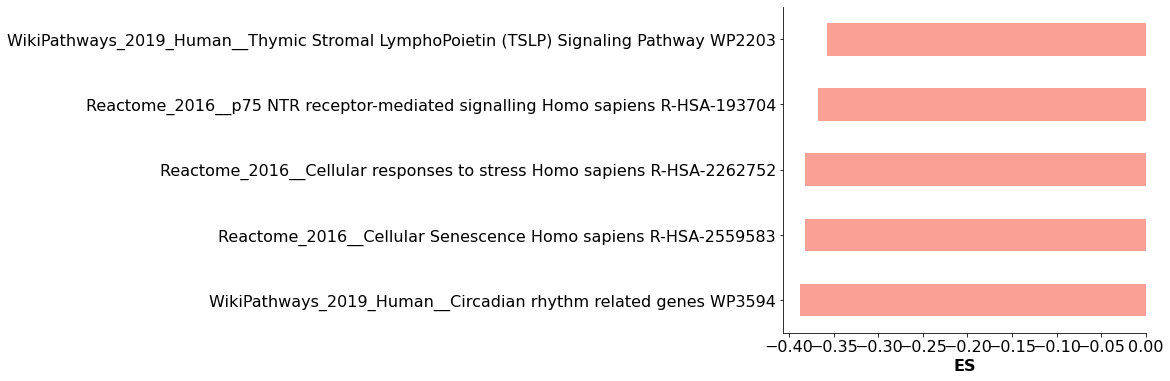

In [60]:
gp.barplot( pre_res.res2d, column = "Gene %" )

In [8]:
class GeneSetCollection:
    """
    This class handles a collection of gene sets for different cell types.
    
    Parameters
    ----------
    gene_sets : dict
        A dictionary with cell type labels as keys and a dataframe of extracted genes with a "State" column to describe their assigned state.
    """
    def __init__( self, gene_sets : dict, expressions : dict = None ):
        self._gene_sets = gene_sets

    def keys( self ):
        return self._gene_sets.keys()
    
    def values( self ):
        return self._gene_sets.values()

    def items( self ):
        return self._gene_sets.items()

    def subsets( self, cell_type : str = None ):
        """
        Return a groupby object for the given cell_type dataframe. 
        
        Parameters
        ----------
        cell_type : str
            The cell type label. If none is provided a generator is returned with a groupby object for each cell type.
        
        Returns
        -------
        groupby
            A groupby object for the given cell_type dataframe. Or a generator with a groupby object for each cell type.
        """
        if cell_type:
            return self._gene_sets[ cell_type ].groupby( "State" )
        else:
            return ( i.groupby( "State" ) for i in self._gene_sets.values() )

    @property
    def cell_types( self ):
        return self._gene_sets.keys()

    def __getitem__( self, key ):
        if isinstance( key, tuple ):
            key, state = key
            
        df = self._gene_sets[key]
        if state:
            df = df[  df[ "State" ] == state  ]
        return df

    def __iter__( self ):
        return iter( self._gene_sets )
    
    def __len__( self ):
        return len( self._gene_sets )
    
    def __contains__( self, key ):
        return key in self._gene_sets
    
    def __repr__( self ):
        return f"GeneSetCollection({ list( self._gene_sets.keys() ) })"

sets = GeneSetCollection( sets )

In [9]:
sets[ "Mast_cells", "S01" ]

UnboundLocalError: local variable 'state' referenced before assignment